<a href="https://colab.research.google.com/github/yfhkucing/experiment_bms/blob/master/visualisasi_vxvy_30_edit2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import joblib
import numpy as np
import pandas as pd

In [3]:
! unzip /content/models_vxvy_30_a01.zip

Archive:  /content/models_vxvy_30_a01.zip
replace content/models/model 4? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: content/models/model 4  
  inflating: content/models/model 20  
  inflating: content/models/model 3  
  inflating: content/models/model 6  
  inflating: content/models/model 21  
  inflating: content/models/model 27  
  inflating: content/models/model 1  
  inflating: content/models/model 7  
  inflating: content/models/model 22  
  inflating: content/models/model 2  
  inflating: content/models/model 8  
  inflating: content/models/model 0  
  inflating: content/models/model 25  
  inflating: content/models/model 16  
  inflating: content/models/model 13  
  inflating: content/models/model 19  
  inflating: content/models/model 17  
  inflating: content/models/model 18  
  inflating: content/models/model 9  
  inflating: content/models/model 24  
  inflating: content/models/model 23  
  inflating: content/models/model 29  
  inflating: content/models/model 12 

In [4]:
feature = pd.read_excel('data_model.xlsx',sheet_name='feature')
label = pd.read_excel('data_model.xlsx',sheet_name='label_30')

In [5]:
def norm(df):
  df=(df-df.min())/(df.max()-df.min())
  return df

def remap(df,new_max,new_min):
  df = (df-df.min())/(df.max()-df.min())*(new_max - new_min) + new_min
  return df

def rescale(df,new_max,new_min):
  df = df *(new_max - new_min) + new_min
  return df

from sklearn.preprocessing import StandardScaler
def standard(df):
  scaler = StandardScaler()
  df = scaler.fit_transform(df)
  return df

def rescale(df,df2):
  new_max = df2.max()
  new_min = df2.min()
  df = (df)*(new_max - new_min) + new_min
  return df

In [6]:
feature = norm(feature)

In [7]:
array_y = []
array_y_not_normal = []

for i in range(30):
  frame= label[i::30]
  frame = frame.drop(['koor_x','koor_y','Temp'],axis=1)
  array_y_not_normal.append(frame)
  frame = norm(frame)
  array_y.append(frame)

In [8]:
a = rescale(array_y[0],array_y_not_normal[0])

In [9]:
a

,Vx,Vy
0,0.002399,-0.073255
30,0.002676,-0.077866
60,0.002554,-0.078099
90,0.002452,-0.075487
120,0.002453,-0.075477
...,...,...
5610,0.002527,-0.171082
5640,-0.002345,-0.105026
5670,0.008001,-0.093210
5700,0.003526,-0.097079


In [10]:
array_y_not_normal[0]

,Vx,Vy
0,0.002399,-0.073255
30,0.002676,-0.077866
60,0.002554,-0.078099
90,0.002452,-0.075487
120,0.002453,-0.075477
...,...,...
5610,0.002527,-0.171082
5640,-0.002345,-0.105026
5670,0.008001,-0.093210
5700,0.003526,-0.097078


In [11]:
a.describe(include = 'all') == array_y_not_normal[0].describe(include = 'all')

,Vx,Vy
count,True,True
mean,True,True
std,True,True
min,True,True
25%,False,False
50%,False,False
75%,False,False
max,True,True


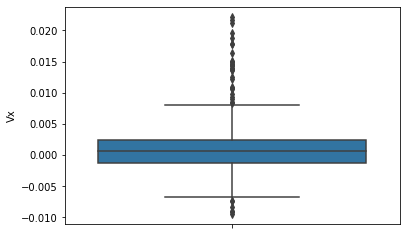

In [12]:
import seaborn as sns
sns.boxplot(y = a['Vx'])

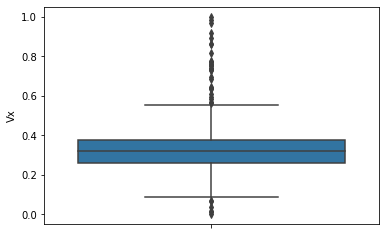

In [13]:
sns.boxplot(y = array_y[0]['Vx'])

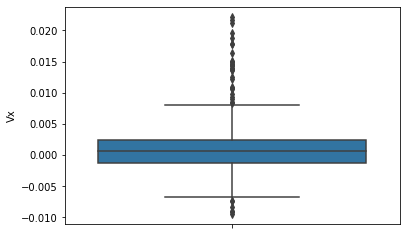

In [14]:
sns.boxplot(y = array_y_not_normal[0]['Vx'])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

skor_r2=[]
mae_=[]
rmse = []
y_predict = []
y_test = []
for i in range(30):
  x = np.array(feature)
  y = np.array(array_y[i])
  model = joblib.load(f'/content/content/models/model {i}')
  y_pred = model.predict(x)
  Skor_r2 = r2(y,y_pred)
  RMSE = mse(y,y_pred,squared=False)
  MAE = mae(y,y_pred)
  y_predict.append(y_pred)
  skor_r2.append(Skor_r2)
  mae_.append(MAE)
  rmse.append(RMSE)

In [16]:
skor_r2 = np.array(skor_r2)
rmse = np.array(rmse)
mae_=np.array(mae_)
y_predict = np.array(y_predict)
y = np.array(array_y)

In [17]:
y.shape,y_predict.shape

((30, 192, 2), (30, 192, 2))

In [18]:
#error per skenario

r_squared = []
abs_error = []
sqrt_error = []
indexing = 0,1
for i in range(192):
  a = y[...,i,indexing]
  b = y_predict[...,i,indexing]
  r_squared.append(r2(a,b))
  abs_error.append(mae(a,b))
  sqrt_error.append(mse(a,b))

In [19]:
error = pd.DataFrame(r_squared,columns=['r2'])
abs_error = pd.DataFrame(abs_error,columns=['mae'])
sqrt_error = pd.DataFrame(sqrt_error,columns=['rmse'])
error = error.join(abs_error)
error = error.join(sqrt_error)

In [20]:
error.describe()

,r2,mae,rmse
count,192.000000,192.000000,192.000000
mean,0.504730,0.126113,0.032574
std,0.375230,0.057426,0.027504
min,-0.564046,0.065059,0.006957
25%,0.222766,0.077133,0.010106
50%,0.770653,0.085647,0.013971
75%,0.804489,0.181934,0.056582
max,0.858454,0.272484,0.117673


In [21]:
error[error.r2 == error.r2.max()]

,r2,mae,rmse
105,0.858454,0.065059,0.006957


In [22]:
error[error.r2 == error.r2.min()]

,r2,mae,rmse
41,-0.564046,0.167319,0.080608


In [23]:
r2_matrix = skor_r2.reshape(5,6)
rmse_matrix = rmse.reshape(5,6)
mae_matrix = mae_.reshape(5,6)

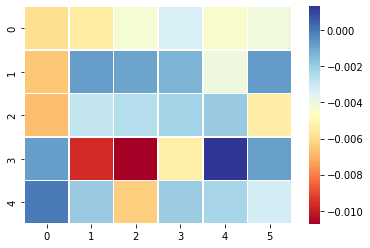

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(r2_matrix, linewidth=0.5, cmap="RdYlBu")
plt.show()

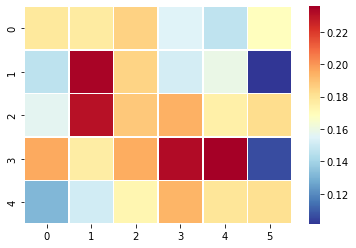

In [25]:
bx = sns.heatmap(rmse_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

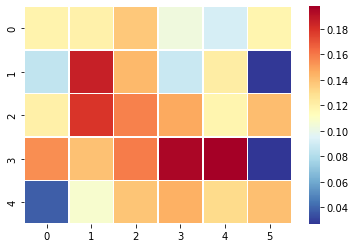

In [26]:
bx = sns.heatmap(mae_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [27]:
#_________break__________

In [28]:
df_koor = pd.read_excel('data_model.xlsx',sheet_name='koordinat_30_aktual')

In [29]:
y.shape

(30, 192, 2)

In [30]:
np.array(array_y_not_normal).shape

(30, 192, 2)

In [31]:
len(array_y_not_normal) == len(y)

True

In [32]:
df_y = []
df_y_predict = []
for i in range(30):
  q = pd.DataFrame(y[i],columns=['Vx','Vy'])
  q = rescale(q,array_y_not_normal[i])
  df_y.append(q)
  r = pd.DataFrame(y_predict[i],columns=['Vx','Vy'])
  r = rescale(r,array_y_not_normal[i])
  df_y_predict.append(r)

In [33]:
np.array(df_y).shape 

(30, 192, 2)

In [34]:
#array_y_not_normal[0]

In [35]:
def kec_angin(y,scenarios):
  df_x = pd.DataFrame(y[...,scenarios,0])
  df_y = pd.DataFrame(y[...,scenarios,1])
  df_y.rename(columns={0:1},inplace=True)
  df_x = df_x.join(df_y)
  df_x = df_x.join(df_koor)
  df_x.rename(columns={0:'Vx',1:'Vy',},inplace=True)
  return df_x

In [ ]:
a = kec_angin(np.array(df_y),105)
a.drop(['koor_x','koor_y'],axis=1)

In [ ]:
b = kec_angin(np.array(df_y_predict),105)
b.drop(['koor_x','koor_y'],axis=1)

In [39]:
#error per skenario

r_squared = []
abs_error = []
sqrt_error = []
indexing = 0,1
for i in range(192):
  a = kec_angin(np.array(df_y),i)
  a.drop(['koor_x','koor_y'],axis=1)
  b = kec_angin(np.array(df_y_predict),i)
  b.drop(['koor_x','koor_y'],axis=1)
  r_squared.append(r2(a,b))
  abs_error.append(mae(a,b))
  sqrt_error.append(mse(a,b))

error = pd.DataFrame(r_squared,columns=['r2'])
abs_error = pd.DataFrame(abs_error,columns=['mae'])
sqrt_error = pd.DataFrame(sqrt_error,columns=['rmse'])
error = error.join(abs_error)
error = error.join(sqrt_error)

In [40]:
error.describe()

,r2,mae,rmse
count,192.000000,192.000000,192.000000
mean,-3.609717,0.016466,0.001573
std,14.656351,0.008232,0.001694
min,-92.890674,0.008293,0.000300
25%,-0.478320,0.009635,0.000363
50%,0.357210,0.012214,0.000809
75%,0.588336,0.023346,0.002067
max,0.725026,0.036447,0.007283


In [41]:
error[error.r2 == error.r2.max()]

,r2,mae,rmse
171,0.725026,0.018408,0.001172


In [42]:
error[error.r2 == error.r2.min()]

,r2,mae,rmse
9,-92.890674,0.009759,0.000341


In [43]:
import plotly.graph_objects as go
from plotly.figure_factory import create_quiver

def tampilan_vektor(Y,scale,arrow):
  x = Y['koor_x']
  y = Y['koor_y']
  u = Y['Vx']
  v = Y['Vy']

  fig = create_quiver(x,y,u,v, scale=scale, arrow_scale=arrow)
  
  fig.show()

In [44]:
scenarios=171
angin_test = kec_angin(np.array(df_y),scenarios)
angin_pred = kec_angin(np.array(df_y_predict),scenarios)

In [45]:
df_koor

,koor_x,koor_y
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
5,1,6
6,2,1
7,2,2
8,2,3
9,2,4


In [51]:
tampilan_vektor(angin_test,5,0.1)

In [52]:
tampilan_vektor(angin_pred,5,0.1)